In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

Did you notice the slow speeds of the previous parts where lines and circles are detected using Hough Transform.

You can calculate run time of the previous codes using time() function in time module.

List atleast three reasons for the algorithm taking so much time.

In [2]:
reasons = '''1) For each of the edge pixel it searches for entire parameter space. As we increase the sampling of parameters in the parameter space, the computational time increases tremendously. 

2) From line detection to circle detection (as we move towards detection of more complex shapes), the number of parameters starts increasing (like two parameters in line detection and 
three parameters for circle detection). This increases the computational time too. Hence, the computaional time increase as the dimensionality of parameter space increases (due to complexity in shape).

3) Accumulator is also usually large in size. Any operation on accumulator is computationally heavy.
'''   #Replace ... by your reasons
print(reasons)

1) For each of the edge pixel it searches for entire parameter space. As we increase the sampling of parameters in the parameter space, the computational time increases tremendously. 

2) From line detection to circle detection (as we move towards detection of more complex shapes), the number of parameters starts increasing (like two parameters in line detection and 
three parameters for circle detection). This increases the computational time too. Hence, the computaional time increase as the dimensionality of parameter space increases (due to complexity in shape).

3) Accumulator is also usually large in size. Any operation on accumulator is computationally heavy.



Suggest atleast two methods to speed up the algorithm.

In [3]:
methods = '''1) Probably the simplest way to gain speed is by downscaling the image and then performing line hough or coircle hough transform.
By downscaling we have to search parameters for lesser number of edge pixels, that saves time.

2) Time can also be saved by following a hierarchical  approach where in we do a coarse sampling of parameter space initially. Once we get a majority vote winner, 
we once again do finer sampling of the selected winner bin.

3) We can also save time by utilizing gradient of edges. the gradient of edge already provide crucial information about direction or slope perpendicular (in case of line detection). 
Hence searching for lines with slope near the gradient perpendicular can narrow down the search space and thus will save time.

4) We can utilize parallel computing to increase the speed. As computation of parameters with respect to each of the edge pixel is an independent operation, 
we can deploy parallel computation for multiple edge pixel. Even the voting can be made parallel to save time.

'''   #Replace ... by your methods
print(methods)

1) Probably the simplest way to gain speed is by downscaling the image and then performing line hough or coircle hough transform.
By downscaling we have to search parameters for lesser number of edge pixels, that saves time.

2) Time can also be saved by following a hierarchical  approach where in we do a coarse sampling of parameter space initially. Once we get a majority vote winner, 
we once again do finer sampling of the selected winner bin.

3) We can also save time by utilizing gradient of edges. the gradient of edge already provide crucial information about direction or slope perpendicular (in case of line detection). 
Hence searching for lines with slope near the gradient perpendicular can narrow down the search space and thus will save time.

4) We can utilize parallel computing to increase the speed. As computation of parameters with respect to each of the edge pixel is an independent operation, 
we can deploy parallel computation for multiple edge pixel. Even the voting can 

Implement any one of the above methods on either line or circle detection code (your own code) and calculate the time taken by your method.

**The improved hough transform performance is demonstrated via Method-1 (i.e through downscaling the image). The method is demonstrated for both circle as well as line hough transform.**

In [6]:
import argparse
import cv2
import imageio
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab.patches import cv2_imshow
import time

In [13]:
# If by mistake image files are not available in folder the programs below do not say "file is not available".
# Rather it blames some of the operation in the function below. I DID THIS MISTAKE AND WASTED MY TIME IN DEBUGGING (unnecessarily).
# Hence in this cell i am just checking if image files are available or not. I am importing "os" library just for checking.
# This cell has no relation to any of the algorithm assigned to us. We can surely remove this cell and the notebook will run normally.
import os
print("Notation: True -> Available, False -> Not Available")
print("Is Pic 1 available (True/False) ", os.path.exists('./pic1.png'))
print("Is Pic 2 available (True/False) ", os.path.exists('./pic2.png'))

print("\nIf both the files are available, We are good to go !")

Notation: True -> Available, False -> Not Available
Is Pic 1 available (True/False)  True
Is Pic 2 available (True/False)  True

If both the files are available, We are good to go !


The next cell will compute time for the normal circle detection hough transform method.

(The algorithm in this case is same as Assign2 Q4)

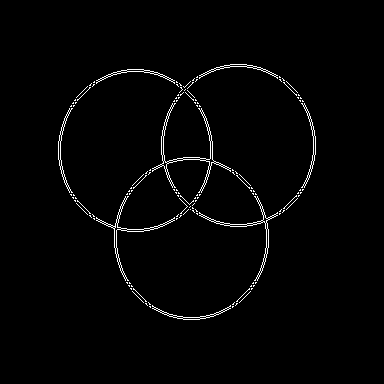

Detecting Hough Circles Started!


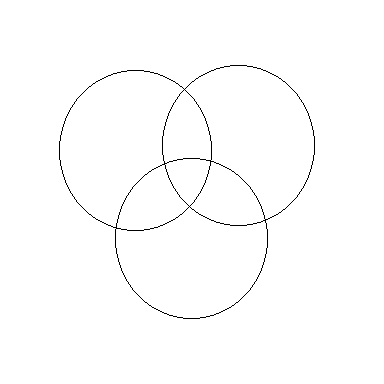

Detecting Hough Circles Complete!
--------------------------------------------------------------------------------------------------------------------
The time taken for executing Normal Circle Hough is:  60.15369534492493 


That's quite high !
--------------------------------------------------------------------------------------------------------------------


In [14]:
# A function defined to sum all the votes in accumulator
def sum_accum_value(acc):
    '''
    A simple function just to find summ of all the votes in the accumulator
    Input:
    acc - (accumulatar) - a list where each element has (a,b,r),v - where v is vote that has to be summed up

    Output:
    val_sum - int - sum of all the votes

    Used library:
    Numpy only

    '''
    tnum = len(acc) 
    val_sum = 0
    for i in range(tnum):
        val_sum += acc[i][1]
    return val_sum

## In this function, after getting the edge image, circle detection will be carried out.

def find_hough_circles(image, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold, post_process = True):

    '''
    Input:

    image - Input 2-D RGB image

    edge_image - Canny algorithm output of image variable

    r_min - Min radius circle to detect. Default is 10.

    r_max - Max radius circle to detect. Default is 200.

    delta_r - Delta change in radius from r_min to r_max. Default is 1.

    num_thetas - Number of steps for theta from 0 to 2PI. Default is 100.

    bin_threshold - Thresholding value in percentage to shortlist candidate for circle. Default is 0.4 i.e. 40%.

    Output:

    output_image

    out_circles

    '''


    img_height, img_width = edge_image.shape[:2]

    # R and Theta ranges
    dtheta = int(360 / num_thetas)

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #    ## Use np.arange; divide 0 to 360 in dtheta steps; name it thetas ## 
    # Write your code here #    ## Use np.arange; divide radius from r_min to r_max in delta_r steps; name it rs ##
    thetas = np.arange(0.0, 360.0, dtheta)
    rs = np.arange(r_min, r_max, delta_r)
    
    # Cos and Sin of theta values required later
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))


    circle_candidates = []

    for r in rs:
        for t in range(num_thetas):
            circle_candidates.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))

    accumulator = defaultdict(int)


    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #    ##  Using nested for loops, for every point (x,y) in edge_image, 
                               #  1. for every white pixel,
                               #  2. iterate through all three variables of circle_candidates namely r,rcos_t and rsin_t together
                               #     and calculate x_center = x - rcos_t and y_center = y - rsin_t    
                               #  3. and, increment the accumulator using accumulator[(x_center, y_center, r)] += 1 

    x_idxs = []
    y_idxs = []
    for i in range(img_width):
        for j in range(img_height):
            if edge_image[i,j] >= 200:
                x_idxs.append(i)
                y_idxs.append(j)


    for i in range(len(x_idxs)):
        for k in range(len(circle_candidates)):
            x_center = int(x_idxs[i] - circle_candidates[k][1])
            y_center = int(y_idxs[i] - circle_candidates[k][2])
            accumulator[(x_center, y_center, r)] += 1

    output_img = image.copy()
    out_circles = []

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #   ## Sort the accumulator votes, remember it is a dictionary; thus, sort by value (i.e. votes) 
                              # Aim is to only keep that candidate_circle value whose vote percentage is above the bin_threshold value 
                              # so as to minimize the number of candidate circles
                              # After that, store that centre coordinate and radius tuple i.e. (xo,yo,r) along with its vote percentage
                              # together using variable out_circles ; Hint: Use out_circles.append((xo, yo, r, vote_percentage))
                              # Also, print (xo,yo,r,vote_percentage) 
    

    sorted_accumulator = sorted(accumulator.items() , key=lambda i: -i[1])
    total_vote = sum_accum_value(sorted_accumulator)

    for k, v in sorted_accumulator:
            x, y, r = k
            if (v / total_vote) >= bin_threshold :
                print(x, y, r,(v/total_vote))
                out_circles.append((x, y, r,v / total_vote))


    # This step further narrows down our candidates by eliminating very nearby circles 
    # and only keeps circles which are far from each other by a pixel_threshold
    if post_process :
        pixel_threshold = 5
        postprocess_circles = []
        for x, y, r, v in out_circles:
            if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, v in postprocess_circles):
                postprocess_circles.append((x, y, r, v))
        out_circles = postprocess_circles


    for x, y, r, v in out_circles:
        output_img = cv2.circle(output_img, (x,y), r, (123,15,125), 2)

    return output_img, out_circles




###################################################################
## Try to vary these values and observe the change in output   ###
## The best values may or may not be the given values          ####
r_min = 10
r_max = 200
delta_r = 1
num_thetas = 100
bin_threshold = 0.4
min_edge_threshold = 100
max_edge_threshold = 200
###################################################################

ct_begin = time.time()
input_img = cv2.imread('pic2.png')
edge_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
edge_image = cv2.Canny(edge_image, min_edge_threshold, max_edge_threshold)
cv2_imshow(edge_image)
cv2.waitKey(0)

if edge_image is not None:
    
    print ("Detecting Hough Circles Started!")
    circle_img, circles = find_hough_circles(input_img, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold)
    cv2_imshow( circle_img)
    cv2.waitKey(0)
    
    
else:
    print ("Error in input image!")
        
print ("Detecting Hough Circles Complete!")


ct_end = time.time()

print("--------------------------------------------------------------------------------------------------------------------")
print("The time taken for executing Normal Circle Hough is: ", (ct_end - ct_begin), "\n")
print("\nThat's quite high !")
print("--------------------------------------------------------------------------------------------------------------------")


# **IMPROVED VERSION OF CIRCLE HOUGH**
### The next cell will compute time for the **improved** circle detection hough transform method. 


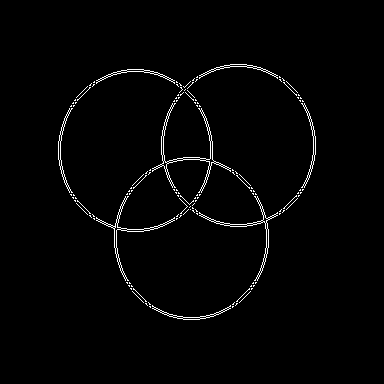

Detecting Hough Circles Started!


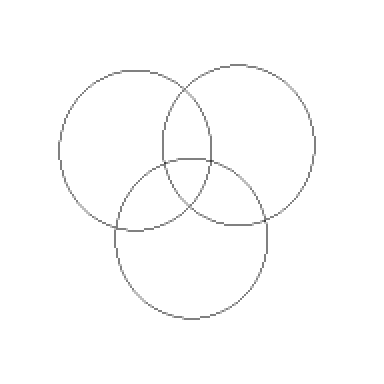

Detecting Hough Circles Complete!
--------------------------------------------------------------------------------------------------------------------
The time taken for executing Normal Circle Hough is just:  0.21660542488098145 

Note: The image was initially downscaled to 50 percent. After the circle identification the circle image was upscaled 

Thus there is an enormous improvement in terms of execution time !
--------------------------------------------------------------------------------------------------------------------


In [15]:
# A function defined to sum all the votes in accumulator
def sum_accum_value(acc):
    '''
    A simple function just to find summ of all the votes in the accumulator
    Input:
    acc - (accumulatar) - a list where each element has (a,b,r),v - where v is vote that has to be summed up

    Output:
    val_sum - int - sum of all the votes

    Used library:
    Numpy only

    '''
    tnum = len(acc) 
    val_sum = 0
    for i in range(tnum):
        val_sum += acc[i][1]
    return val_sum

## In this function, after getting the edge image, circle detection will be carried out.

def find_hough_circles(image, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold, post_process = True):

    '''
    Input:

    image - Input 2-D RGB image

    edge_image - Canny algorithm output of image variable

    r_min - Min radius circle to detect. Default is 10.

    r_max - Max radius circle to detect. Default is 200.

    delta_r - Delta change in radius from r_min to r_max. Default is 1.

    num_thetas - Number of steps for theta from 0 to 2PI. Default is 100.

    bin_threshold - Thresholding value in percentage to shortlist candidate for circle. Default is 0.4 i.e. 40%.

    Output:

    output_image

    out_circles

    '''


    img_height, img_width = edge_image.shape[:2]

    # R and Theta ranges
    dtheta = int(360 / num_thetas)

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #    ## Use np.arange; divide 0 to 360 in dtheta steps; name it thetas ## 
    # Write your code here #    ## Use np.arange; divide radius from r_min to r_max in delta_r steps; name it rs ##
    thetas = np.arange(0.0, 360.0, dtheta)
    rs = np.arange(r_min, r_max, delta_r)
    
    # Cos and Sin of theta values required later
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))


    circle_candidates = []

    for r in rs:
        for t in range(num_thetas):
            circle_candidates.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))

    accumulator = defaultdict(int)


    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #    ##  Using nested for loops, for every point (x,y) in edge_image, 
                               #  1. for every white pixel,
                               #  2. iterate through all three variables of circle_candidates namely r,rcos_t and rsin_t together
                               #     and calculate x_center = x - rcos_t and y_center = y - rsin_t    
                               #  3. and, increment the accumulator using accumulator[(x_center, y_center, r)] += 1 

    x_idxs = []
    y_idxs = []
    for i in range(img_width):
        for j in range(img_height):
            if edge_image[i,j] >= 200:
                x_idxs.append(i)
                y_idxs.append(j)


    for i in range(len(x_idxs)):
        for k in range(len(circle_candidates)):
            x_center = int(x_idxs[i] - circle_candidates[k][1])
            y_center = int(y_idxs[i] - circle_candidates[k][2])
            accumulator[(x_center, y_center, r)] += 1

    output_img = image.copy()
    out_circles = []

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #   ## Sort the accumulator votes, remember it is a dictionary; thus, sort by value (i.e. votes) 
                              # Aim is to only keep that candidate_circle value whose vote percentage is above the bin_threshold value 
                              # so as to minimize the number of candidate circles
                              # After that, store that centre coordinate and radius tuple i.e. (xo,yo,r) along with its vote percentage
                              # together using variable out_circles ; Hint: Use out_circles.append((xo, yo, r, vote_percentage))
                              # Also, print (xo,yo,r,vote_percentage) 
    

    sorted_accumulator = sorted(accumulator.items() , key=lambda i: -i[1])
    total_vote = sum_accum_value(sorted_accumulator)

    for k, v in sorted_accumulator:
            x, y, r = k
            if (v / total_vote) >= bin_threshold :
                print(x, y, r,(v/total_vote))
                out_circles.append((x, y, r,v / total_vote))


    # This step further narrows down our candidates by eliminating very nearby circles 
    # and only keeps circles which are far from each other by a pixel_threshold
    if post_process :
        pixel_threshold = 5
        postprocess_circles = []
        for x, y, r, v in out_circles:
            if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, v in postprocess_circles):
                postprocess_circles.append((x, y, r, v))
        out_circles = postprocess_circles


    for x, y, r, v in out_circles:
        output_img = cv2.circle(output_img, (x,y), r, (123,15,125), 2)

    return output_img, out_circles

def downscale_image(img, scale_frac=0.5):
    '''
    This will downscale the image "img" by a scale = "scale_frac"
    Although the function name is downscale, it can even upscale if the scale_frac is greater than 1
    
    Inputs:
    + img - 2d np array of image to be downscaled or upscaled
    + scale_frac - float - fraction less than 1 for downscaling and greater than 1 for upscaling
    
    Ouputs:
    + out_img - np array  - scaled image array
    
    Used modules:
    +  numpy 
    + cv2.resize
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    width = int(img.shape[1]*scale_frac)
    height = int(img.shape[0]*scale_frac)
    dim = (width,height)
    out_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    #############################
    # End your code here ########
    #############################    
    
    return out_img





###################################################################
## Try to vary these values and observe the change in output   ###
## The best values may or may not be the given values          ####
r_min = 10
r_max = 200
delta_r = 1
num_thetas = 100
bin_threshold = 0.4
min_edge_threshold = 100
max_edge_threshold = 200
scale_frac=0.5
###################################################################

ct_begin = time.time()
input_img = cv2.imread('pic2.png')
dwn_img = downscale_image(input_img, scale_frac)

edge_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
edge_image = cv2.Canny(edge_image, min_edge_threshold, max_edge_threshold)

dwn_edge_img = downscale_image(edge_image, scale_frac)

cv2_imshow(edge_image)
cv2.waitKey(0)

if edge_image is not None:
    
    print ("Detecting Hough Circles Started!")
    circle_img, circles = find_hough_circles(dwn_img, dwn_edge_img, r_min, r_max, delta_r, num_thetas, bin_threshold)
    circle_img = dwn_img = downscale_image(circle_img, 1/scale_frac)
    cv2_imshow( circle_img)
    cv2.waitKey(0)
    
    
else:
    print ("Error in input image!")
        
print ("Detecting Hough Circles Complete!")


ct_end = time.time()

print("--------------------------------------------------------------------------------------------------------------------")
print("The time taken for executing Normal Circle Hough is just: ", (ct_end - ct_begin), "\n")
print("Note: The image was initially downscaled to 50 percent. After the circle identification the circle image was upscaled ")

print("\nThus there is an enormous improvement in terms of execution time !")

print("--------------------------------------------------------------------------------------------------------------------")


### The next cell will compute time for the normal line detection hough transform method. 
(The algorithm in this case is same as Assign2 Q3)

In [18]:
# Conventional Method  

def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    
    """
    Input:
    img - 2-D binary image   
    angle_step - Spacing between angles between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - Array of angles used in computation, in radians.
    rhos - Array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    num_rhos = len(rhos)
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    accumulator = np.zeros((num_rhos, num_thetas))
    x_idxs = []
    y_idxs = []
    for i in range(width):
        for j in range(height):
            if img[i,j] >= 250:
                x_idxs.append(i)
                y_idxs.append(j)   
    rhos = rhos.astype(int)
    for i in range(len(x_idxs)):
        for j in range(len(thetas)):
            rho_val = int(round(x_idxs[i] * cos_t[j] + y_idxs[i] * sin_t[j]))
            k = np.where(rhos == rho_val)
            accumulator[k,j] += 1     
    return accumulator, thetas, rhos

def display_hough(img, accumulator, thetas, rhos, save_path=None):
    '''Given in Assgn 2 Question 1'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')


def convolve2D(image, kernel, padding=0, strides=1):
    """
    This function does the 2D convolution operation.
    Input:
    image - 2-D np array of an image
    kernel - 2-D np array of kernel.
    padding - flag (0 or 1) - if padding is required or not
    strides - int - stride value while moving the kernel on image
    
    Returns:
    output - 2D array of convolved image
    
    Used libraries:
    Numpy only
    """
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

def gaussianFilter(img, kernel_size=5, sigma=3, padding=0, strides=1):
    '''
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing. 
    + sigma - sigma parameter for gaussian kernel
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'

    '''
    mid = (kernel_size-1)/2
    normal = 1/(np.sqrt(2*np.pi*(sigma**2))) 
    x_k = np.zeros(kernel_size)
    for i in range(kernel_size):
        x = mid-i
        x_k[i] = normal * np.exp(-(x**2)/(2*(sigma**2)))
        
    x_k = x_k.reshape((len(x_k), 1))
    y_k = x_k
    kernel = x_k.dot(y_k.T)
    kernel = kernel/np.sum(kernel)
    out_img = convolve2D(img, kernel, padding, strides)
    out_img.astype(int)   
    return out_img

def find_local_max(img):
    """
    This function finds local maxima in a 3x3 area.
    Input:
    img - 2-D np array of an image
    
    Returns:
    nms_im - 2D array of image where local maxima has nonzero values only
    
    Used libraries:
    Numpy only
    """
    nms_im = np.zeros((n_rows, n_cols));
    for i in range(1,n_rows-1):
        for j in range(1,n_cols-1):  
                a = img[i, j+1]
                b = img[i, j-1]
                c = img[i+1, j-1]
                d = img[i-1, j+1]
                e = img[i+1, j]
                f = img[i-1, j]
                g = img[i-1, j-1]
                h = img[i+1, j+1]
                if (img[i,j] >= a) and (img[i,j] >= b) and (img[i,j] >= c) and (img[i,j] >= d) and (img[i,j] >= e) and (img[i,j] >= f) and (img[i,j] >= g) and (img[i,j] >= h):
                    nms_im[i,j] = img[i,j]
                else:
                    nms_im[i,j] = 0
    return nms_im

def get_theta_rad(line_candidate_idx, thetas, rhos):
    """
    This is a problem specific function which uses index from line_candidate_idx
    to find corresponding thetas and rhos value
    Input:
    line_candidate_idx - list of 2 elements where 1st is tuple of rho indices,
                            1st is tuple of theta indices
    
    Returns:
    theta_candid - 1d array of corresponding theta values.
    rho_candid - 1d array of corresponding rho values.
    
    Used libraries:
    Numpy only
    """
    no_candid = len(line_candidate_idx[0])
    theta_candid = []
    rho_candid = []
    for i in range(no_candid):
        lci0 = line_candidate_idx[0][i]
        lci1 = line_candidate_idx[1][i]
        theta_candid.append(round(np.rad2deg(thetas[lci1])*100)/100)
        rho_candid.append(rhos[lci0])
    theta_candid = np.array(theta_candid)
    rho_candid = np.array(rho_candid)
    return theta_candid, rho_candid


###################### MAIN #####################
kernel_size=5
sigma=1
th = 65
img = imageio.imread('pic1.png') 

t_begin = time.time()

accumulator, thetas, rhos = line_detect_hough(img)
smooth_accum = gaussianFilter(accumulator, kernel_size=5, sigma=3)
n_rows, n_cols = smooth_accum.shape
th_img = np.zeros((n_rows, n_cols))
for i in range(n_rows):
    for j in range(n_cols):
        if smooth_accum[i,j] > th:
            th_img[i,j] = smooth_accum[i,j]

locmax_img = find_local_max(th_img)
line_candidate_idx = np.nonzero(locmax_img)
theta_candid, rho_candid = get_theta_rad(line_candidate_idx, thetas, rhos)

t_end = time.time()

print("--------------------------------------------------------------------------------------------------------------------")
print("---------------------------------The probable rho and theta (deg) candidates are -----------------------------------")

for i in range(len(theta_candid)):
    print("rho = ",rho_candid[i], "theta = ",theta_candid[i] )

print("The time taken for executing Normal Line Hough is: ", (t_end - t_begin), "\n")
print("\nThat's quite high !")
print("--------------------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------------------
---------------------------------The probable rho and theta (deg) candidates are -----------------------------------
rho =  -31 theta =  -69.0
rho =  -10 theta =  -52.0
rho =  4 theta =  -47.0
rho =  27 theta =  -42.0
rho =  31 theta =  -41.0
rho =  35 theta =  -40.0
rho =  38 theta =  -39.0
rho =  142 theta =  45.0
rho =  155 theta =  15.0
rho =  205 theta =  52.0
rho =  222 theta =  50.0
The time taken for executing Normal Line Hough is:  17.3114652633667 


That's quite high !
--------------------------------------------------------------------------------------------------------------------


# **IMPROVED VERSION OF LINE HOUGH**
### The next cell will compute time for the **improved** line detection hough transform method. 


In [20]:
# Improved Method  

def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    
    """
    Input:
    img - 2-D binary image   
    angle_step - Spacing between angles between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - Array of angles used in computation, in radians.
    rhos - Array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    num_rhos = len(rhos)
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    accumulator = np.zeros((num_rhos, num_thetas))
    x_idxs = []
    y_idxs = []
    for i in range(width):
        for j in range(height):
            if img[i,j] >= 250:
                x_idxs.append(i)
                y_idxs.append(j)   
    rhos = rhos.astype(int)
    for i in range(len(x_idxs)):
        for j in range(len(thetas)):
            rho_val = int(round(x_idxs[i] * cos_t[j] + y_idxs[i] * sin_t[j]))
            k = np.where(rhos == rho_val)
            accumulator[k,j] += 1     
    return accumulator, thetas, rhos

def display_hough(img, accumulator, thetas, rhos, save_path=None):
    '''Given in Assgn 2 Question 1'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')


def convolve2D(image, kernel, padding=0, strides=1):
    """
    This function does the 2D convolution operation.
    Input:
    image - 2-D np array of an image
    kernel - 2-D np array of kernel.
    padding - flag (0 or 1) - if padding is required or not
    strides - int - stride value while moving the kernel on image
    
    Returns:
    output - 2D array of convolved image
    
    Used libraries:
    Numpy only
    """
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

def gaussianFilter(img, kernel_size=5, sigma=3, padding=0, strides=1):
    '''
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing. 
    + sigma - sigma parameter for gaussian kernel
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'

    '''
    mid = (kernel_size-1)/2
    normal = 1/(np.sqrt(2*np.pi*(sigma**2))) 
    x_k = np.zeros(kernel_size)
    for i in range(kernel_size):
        x = mid-i
        x_k[i] = normal * np.exp(-(x**2)/(2*(sigma**2)))
        
    x_k = x_k.reshape((len(x_k), 1))
    y_k = x_k
    kernel = x_k.dot(y_k.T)
    kernel = kernel/np.sum(kernel)
    out_img = convolve2D(img, kernel, padding, strides)
    out_img.astype(int)   
    return out_img

def find_local_max(img):
    """
    This function finds local maxima in a 3x3 area.
    Input:
    img - 2-D np array of an image
    
    Returns:
    nms_im - 2D array of image where local maxima has nonzero values only
    
    Used libraries:
    Numpy only
    """
    nms_im = np.zeros((n_rows, n_cols));
    for i in range(1,n_rows-1):
        for j in range(1,n_cols-1):  
                a = img[i, j+1]
                b = img[i, j-1]
                c = img[i+1, j-1]
                d = img[i-1, j+1]
                e = img[i+1, j]
                f = img[i-1, j]
                g = img[i-1, j-1]
                h = img[i+1, j+1]
                if (img[i,j] >= a) and (img[i,j] >= b) and (img[i,j] >= c) and (img[i,j] >= d) and (img[i,j] >= e) and (img[i,j] >= f) and (img[i,j] >= g) and (img[i,j] >= h):
                    nms_im[i,j] = img[i,j]
                else:
                    nms_im[i,j] = 0
    return nms_im

def get_theta_rad(line_candidate_idx, thetas, rhos):
    """
    This is a problem specific function which uses index from line_candidate_idx
    to find corresponding thetas and rhos value
    Input:
    line_candidate_idx - list of 2 elements where 1st is tuple of rho indices,
                            1st is tuple of theta indices
    
    Returns:
    theta_candid - 1d array of corresponding theta values.
    rho_candid - 1d array of corresponding rho values.
    
    Used libraries:
    Numpy only
    """
    no_candid = len(line_candidate_idx[0])
    theta_candid = []
    rho_candid = []
    for i in range(no_candid):
        lci0 = line_candidate_idx[0][i]
        lci1 = line_candidate_idx[1][i]
        theta_candid.append(round(np.rad2deg(thetas[lci1])*100)/100)
        rho_candid.append(rhos[lci0])
    theta_candid = np.array(theta_candid)
    rho_candid = np.array(rho_candid)
    return theta_candid, rho_candid



def downscale_image(img, scale_frac=0.5):
    '''
    This will downscale the image "img" by a scale = "scale_frac"
    Although the function name is downscale, it can even upscale if the scale_frac is greater than 1
    
    Inputs:
    + img - 2d np array of image to be downscaled or upscaled
    + scale_frac - float - fraction less than 1 for downscaling and greater than 1 for upscaling
    
    Ouputs:
    + out_img - np array  - scaled image array
    
    Used modules:
    +  numpy 
    + cv2.resize
    
    '''
    
    
    #############################
    # Start your code from here #
    #############################
    
    width = int(img.shape[1]*scale_frac)
    height = int(img.shape[0]*scale_frac)
    dim = (width,height)
    out_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    #############################
    # End your code here ########
    #############################    
    
    return out_img




###################### MAIN #####################
kernel_size=5
sigma=1
th = 25

img = imageio.imread('pic1.png') 

t_begin = time.time()

dwn_img = downscale_image(img, scale_frac=0.5)
accumulator, thetas, rhos = line_detect_hough(dwn_img)
smooth_accum = gaussianFilter(accumulator, kernel_size=5, sigma=3)
n_rows, n_cols = smooth_accum.shape
th_img = np.zeros((n_rows, n_cols))
for i in range(n_rows):
    for j in range(n_cols):
        if smooth_accum[i,j] > th:
            th_img[i,j] = smooth_accum[i,j]

locmax_img = find_local_max(th_img)
line_candidate_idx = np.nonzero(locmax_img)
theta_candid, rho_candid = get_theta_rad(line_candidate_idx, thetas, rhos)

t_end = time.time()

print("--------------------------------------------------------------------------------------------------------------------")
print("---------------------------------The probable rho and theta (deg) candidates are -----------------------------------")

for i in range(len(theta_candid)):
    print("rho = ",rho_candid[i], "theta = ",theta_candid[i] )

print("The time taken for executing Normal Line Hough is: ", (t_end - t_begin), "\n")
print("Note that the rho will be different from first case as the image is rescaled \n")

print("\nThus there is a good improvement in terms of execution time !")

print("--------------------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------------------
---------------------------------The probable rho and theta (deg) candidates are -----------------------------------
rho =  -17 theta =  -70.0
rho =  -1 theta =  -49.0
rho =  1 theta =  -47.0
rho =  3 theta =  -46.0
rho =  7 theta =  -44.0
rho =  16 theta =  -40.0
rho =  20 theta =  -38.0
rho =  69 theta =  45.0
rho =  76 theta =  15.0
rho =  101 theta =  53.0
rho =  102 theta =  59.0
rho =  110 theta =  49.0
The time taken for executing Normal Line Hough is:  4.008952379226685 

Note that the rho will be different from first case as the image is rescaled 


Thus there is a good improvement in terms of execution time !
--------------------------------------------------------------------------------------------------------------------


# **Thus Downscaling Image before performing Hough transform shows a definite improvement in terms of execution time**

In [ ]:
#